## Aplicación de análisis de datos (práctica)

### Anexar notebook o pdf de la misma al Google Classroom para que valga por 2 prácticas si está completa, o lo proporcional correspondiente.

- Elegir un conjunto de datos.
- Puede ser de:
    - https://archive.ics.uci.edu/ml/index.php
    - https://www.kaggle.com/datasets 
    - o datos abiertos:    
        - https://datos.gob.mx
        - https://datos.cdmx.gob.mx/
    - u otras fuentes.
    
- Hacer análisis exploratorio, reducir variables y plantear pregunta a investigar.
- Elegir si conviene un análisis de clasificación o clustering.
- Elegir algoritmo o algoritmos.
- Implementar algoritmos.
- Evaluar algoritmos implementados.
- Predecir o sacar conclusiones del análisis, graficar algún resultado.

**Usaremos el siguiente conjuntode datos:** https://raw.githubusercontent.com/igomezv/DataScienceIntermedio/main/datasets/Dataset_CGO_2018_2022.csv

**1. Describir variables (ejercicio):**

- Date: 

- Demand:

- Temperature:

- PrecipIntensity:

- Humidity: 

- WindSpeed:


**2. Analisis exploratorio**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [2]:
data_url = 'https://raw.githubusercontent.com/igomezv/DataScienceIntermedio/main/datasets/Dataset_CGO_2018_2022.csv'
df = pd.read_csv(data_url)

In [3]:
df.head(5)

,Date,Demand,Temperature,PrecipIntensity,Humidity,WindSpeed
0,01/01/2018 00:00,234.6425,13.9,0.0,49.2,3.3
1,01/01/2018 01:00,229.0717,12.4,0.0,52.1,3.4
2,01/01/2018 02:00,223.3983,10.8,0.0,55.2,3.6
3,01/01/2018 03:00,215.7792,9.3,0.0,58.6,3.7
4,01/01/2018 04:00,211.4717,8.2,0.0,59.4,3.3


In [4]:
df_filtered = df[['Demand', 'Temperature', 'PrecipIntensity', 'Humidity', 'WindSpeed']]

In [5]:
df_filtered.cov

<bound method DataFrame.cov of          Demand  Temperature  PrecipIntensity  Humidity  WindSpeed
0      234.6425        13.90              0.0     49.20       3.30
1      229.0717        12.40              0.0     52.10       3.40
2      223.3983        10.80              0.0     55.20       3.60
3      215.7792         9.30              0.0     58.60       3.70
4      211.4717         8.20              0.0     59.40       3.30
...         ...          ...              ...       ...        ...
42499  340.9796        18.05              0.0      0.22       4.87
42500  338.6403        15.52              0.0      0.26       3.98
42501  340.1250        14.05              0.0      0.28       4.52
42502  324.8993        12.99              0.0      0.30       5.20
42503  315.5033        12.04              0.0      0.34       4.71

[42504 rows x 5 columns]>

In [21]:
df_filtered.corr()

,Demand,Temperature,PrecipIntensity,Humidity,WindSpeed
Demand,1.000000,0.729337,0.019431,-0.207505,0.113248
Temperature,0.729337,1.000000,0.009773,-0.141563,0.176253
PrecipIntensity,0.019431,0.009773,1.000000,0.013182,0.068202
Humidity,-0.207505,-0.141563,0.013182,1.000000,-0.495910
WindSpeed,0.113248,0.176253,0.068202,-0.495910,1.000000


In [22]:
np.abs(df_filtered.corr()) > 0.5

,Demand,Temperature,PrecipIntensity,Humidity,WindSpeed
Demand,True,True,False,False,False
Temperature,True,True,False,False,False
PrecipIntensity,False,False,True,False,False
Humidity,False,False,False,True,False
WindSpeed,False,False,False,False,True


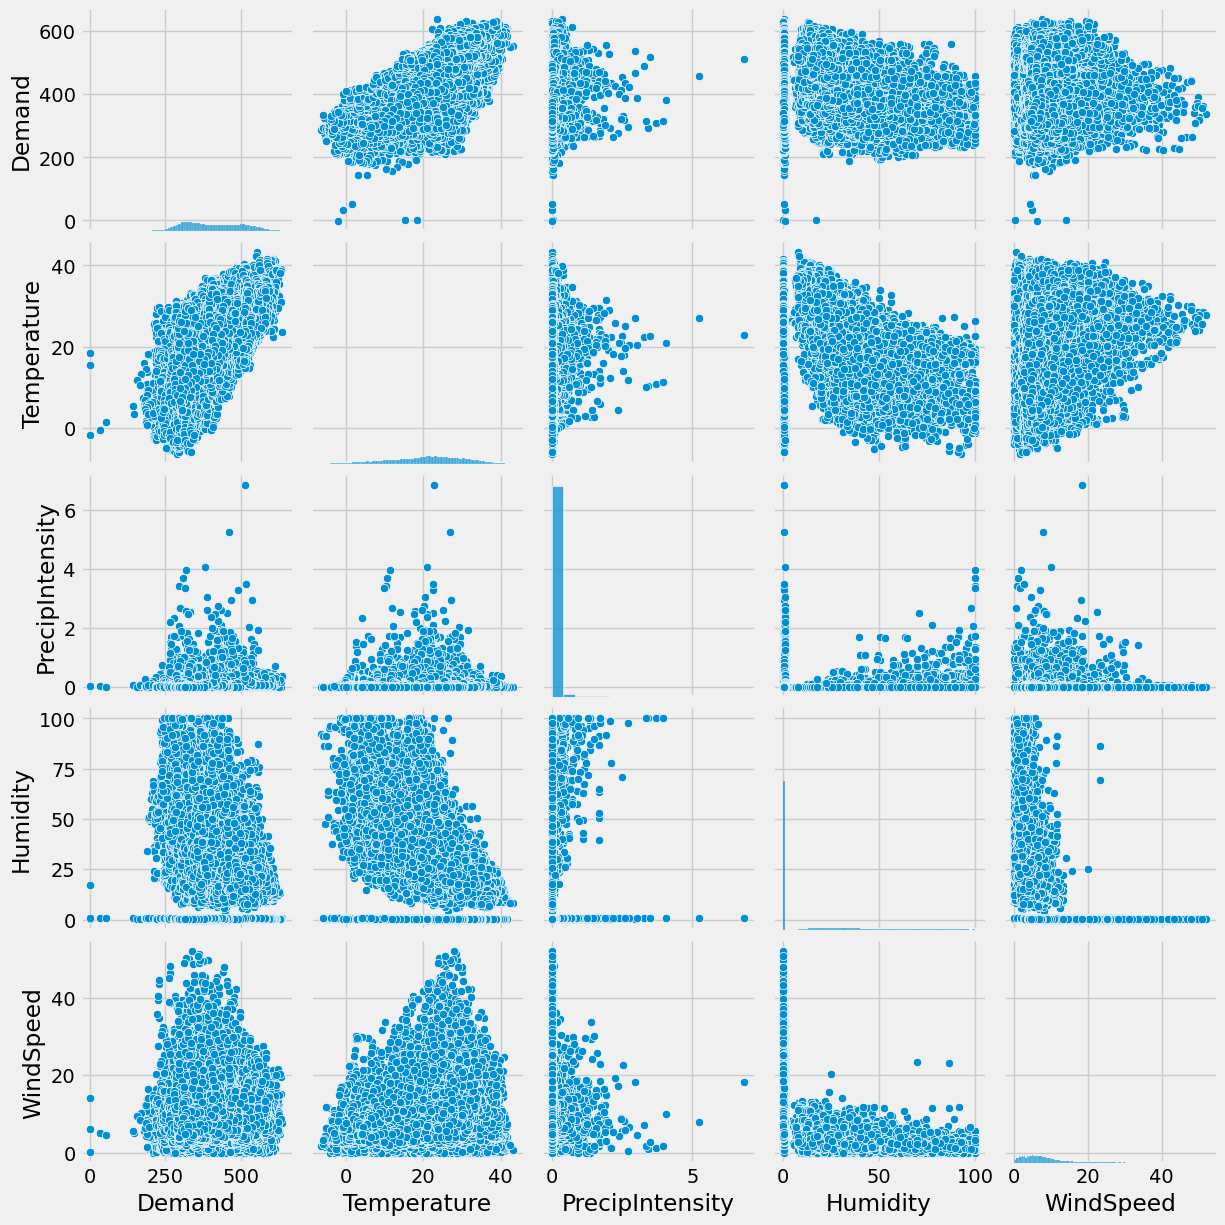

In [7]:
sns.pairplot(df_filtered)

In [8]:
df["Date"].head()

0    01/01/2018 00:00
1    01/01/2018 01:00
2    01/01/2018 02:00
3    01/01/2018 03:00
4    01/01/2018 04:00
Name: Date, dtype: object

In [9]:
df["Date_time"] = pd.to_datetime(df["Date"])

In [10]:
df.head(5)

,Date,Demand,Temperature,PrecipIntensity,Humidity,WindSpeed,Date_time
0,01/01/2018 00:00,234.6425,13.9,0.0,49.2,3.3,2018-01-01 00:00:00
1,01/01/2018 01:00,229.0717,12.4,0.0,52.1,3.4,2018-01-01 01:00:00
2,01/01/2018 02:00,223.3983,10.8,0.0,55.2,3.6,2018-01-01 02:00:00
3,01/01/2018 03:00,215.7792,9.3,0.0,58.6,3.7,2018-01-01 03:00:00
4,01/01/2018 04:00,211.4717,8.2,0.0,59.4,3.3,2018-01-01 04:00:00


In [11]:
df["Date"] = df["Date_time"].dt.date
df["Time"] = df["Date_time"].dt.time
df.head(5)

,Date,Demand,Temperature,PrecipIntensity,Humidity,WindSpeed,Date_time,Time
0,2018-01-01,234.6425,13.9,0.0,49.2,3.3,2018-01-01 00:00:00,00:00:00
1,2018-01-01,229.0717,12.4,0.0,52.1,3.4,2018-01-01 01:00:00,01:00:00
2,2018-01-01,223.3983,10.8,0.0,55.2,3.6,2018-01-01 02:00:00,02:00:00
3,2018-01-01,215.7792,9.3,0.0,58.6,3.7,2018-01-01 03:00:00,03:00:00
4,2018-01-01,211.4717,8.2,0.0,59.4,3.3,2018-01-01 04:00:00,04:00:00


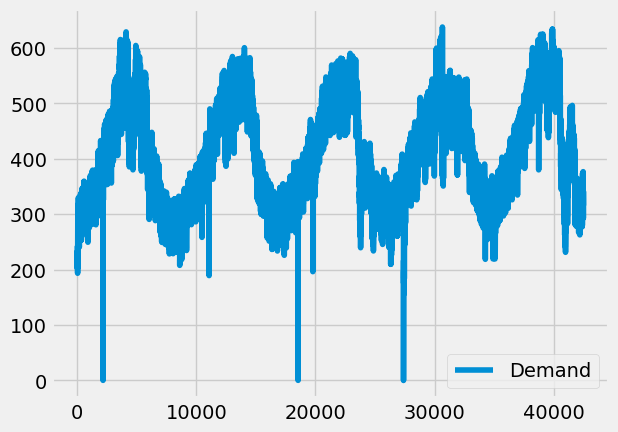

In [12]:
df[['Demand']].plot()
plt.show()

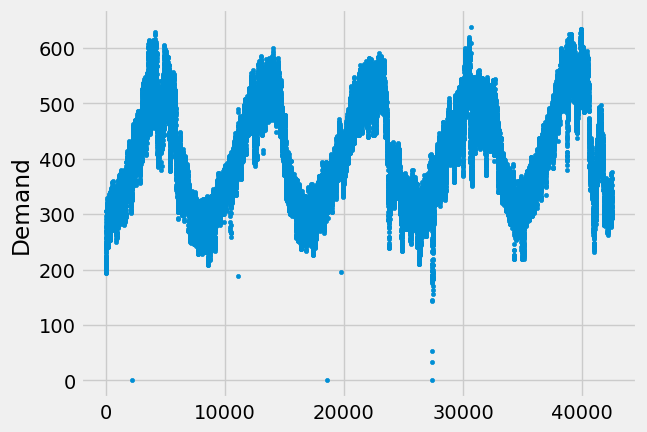

In [13]:
#OR 
plt.scatter(df.index, df.Demand, marker='.')
plt.ylabel("Demand")
plt.show()

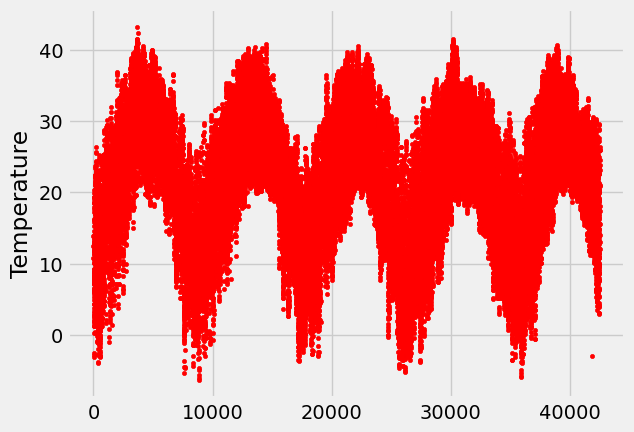

In [14]:
plt.scatter(df.index, df.Temperature, marker='.', color='red')
plt.ylabel("Temperature")
plt.show()

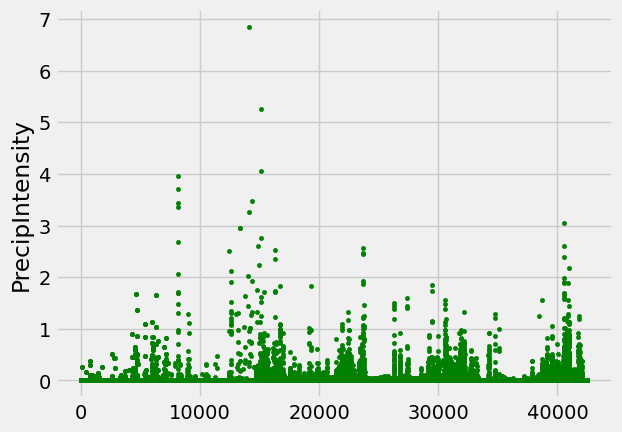

In [15]:
plt.scatter(df.index, df.PrecipIntensity, marker='.', color='green')
plt.ylabel("PrecipIntensity")
plt.show()

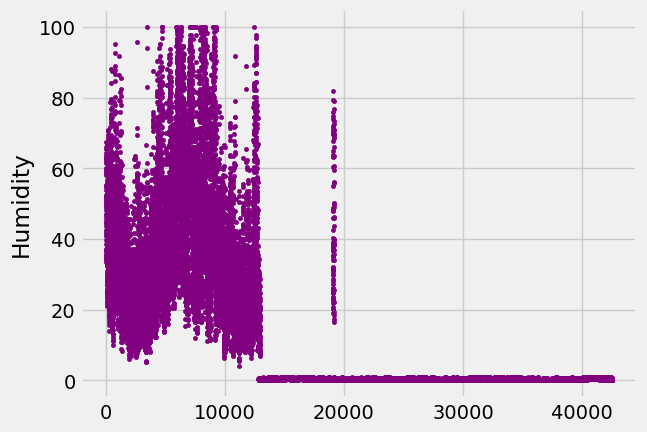

In [16]:
plt.scatter(df.index, df.Humidity, marker='.', color='purple')
plt.ylabel("Humidity")
plt.show()

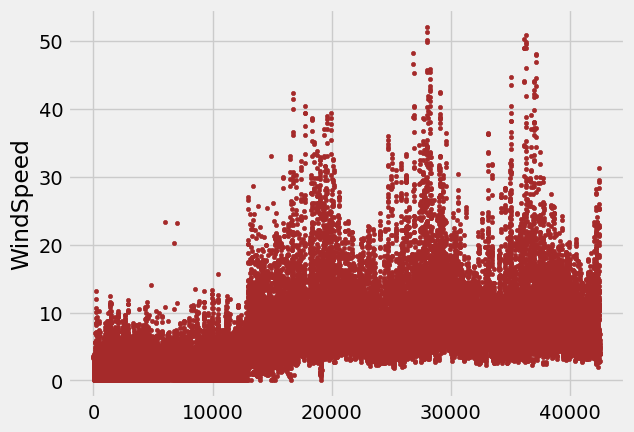

In [17]:
plt.scatter(df.index, df.WindSpeed, marker='.', color='brown')
plt.ylabel("WindSpeed")
plt.show()

**3. Formular preguntas**.

- **3.1. Para clasificación, ¿qué variable podría ser nuestra etiqueta?, ¿qué algoritmo usaríamos?**


- **3.2. Para regresión, ¿qué variables podría ser nuestra variable dependiente?, ¿qué variables podríamos considerar y cuáles no?, ¿qué algoritmo usaríamos?**


- **3.3. ¿Qué variables podríamos considerar para hacer clustering?, ¿valdría la pena?, ¿qué algoritmo usaríamos?**


- **3.4. ¿Nuestro problema interactúa con variables del entorno?, ¿tendría sentido utilizar Aprendizaje por refuerzo?**


- **3.5. ¿Podríamos considerar la base de datos como una imágen o una serie de tiempo?**